# test_megabinary.ipynb

---

## MegaBinary Tests & Demonstrations

This notebook tests the newly upgraded `MegaBinary` class with HPC-limb storage, wave methods, and duty-cycle logic.

### 1) Imports & Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your HPC-limb code in these modules:
from bizarromath.meganumber import MegaBinary, InterferenceMode

### 2) Basic HPC Checks
We'll create a few `MegaBinary` instances from strings and verify basic arithmetic (`add`, `sub`, `mul`, `div`).

In [2]:
# Simple HPC-limb checks
a = MegaBinary("1010")      # (binary 0b1010) => decimal 10
b = MegaBinary("1100")      # decimal 12

print("a:", a)
print("b:", b)

sum_ab = a.add(b)
print("a+b =", sum_ab, "=> decimal:", int(sum_ab.to_decimal_string()))

diff_ab = a.sub(b)
print("a-b =", diff_ab, "=> decimal:", int(diff_ab.to_decimal_string()))

prod_ab = a.mul(b)
print("a*b =", prod_ab, "=> decimal:", int(prod_ab.to_decimal_string()))

try:
    quot_ab = a.div(b)
    if hasattr(quot_ab, "to_string"):  # HPC-limb MegaBinary
        print("a//b =", quot_ab, "=> decimal:", int(quot_ab.to_decimal_string()))
    else:
        # Possibly MegaFloat
        print("a/b => returned MegaFloat", quot_ab)
except ZeroDivisionError as e:
    print("Division error:", e)

a: <MegaBinary 1010>
b: <MegaBinary 1100>
a+b = <MegaBinary 10110> => decimal: 22
a-b = <MegaBinary 10> => decimal: 2
a*b = <MegaBinary 1111000> => decimal: 120
a//b = <MegaBinary 0> => decimal: 0


### 3) Testing Shift Methods
Let's test `shift_left(...)` and `shift_right(...)` with HPC-limb logic.

In [3]:
shift_by = MegaBinary("11")  # decimal 3
left_shifted = a.shift_left(shift_by)
right_shifted = b.shift_right(shift_by)

print("\nShifting 'a=1010' left by 3 =>", left_shifted, 
      "decimal:", int(left_shifted.to_decimal_string()))
print("Shifting 'b=1100' right by 3 =>", right_shifted, 
      "decimal:", int(right_shifted.to_decimal_string()))


Shifting 'a=1010' left by 3 => <MegaBinary 1010000> decimal: 80
Shifting 'b=1100' right by 3 => <MegaBinary 1> decimal: 1


### 4) Shifting-In Bits Over Time
We'll accumulate bits in a HPC-limb. For demonstration, let's do a small wave.

In [4]:
wave_bin = MegaBinary("0", keep_leading_zeros=True)  # ensure we keep top limbs

sample_rate = 10.0
freq = 1.0
duty = 0.5

steps = 16
dt = 1.0 / sample_rate

print("\nSHIFT IN BITS DEMO")
for step in range(steps):
    t = step*dt
    phase = (t*freq) % 1.0
    wave_bit = 1 if phase < duty else 0
    wave_bin.wave_step(wave_bit)  # or shift_in_bit(wave_bit)

    # Print HPC-limb bits in LSB-first order
    print(f"step={step}, wave_bit={wave_bit}, HPC-limb => {wave_bin.to_bits()}")

print("Final HPC-limb full bitstring =>", wave_bin.to_full_bitstring())

# Big-endian example:
be_bits = wave_bin.to_bits_bigendian()
print("Big-endian bits =>", be_bits)
print("Bit string bigendian =>", "".join(str(b) for b in be_bits))


SHIFT IN BITS DEMO
step=0, wave_bit=1, HPC-limb => [1]
step=1, wave_bit=1, HPC-limb => [1]
step=2, wave_bit=1, HPC-limb => [1]
step=3, wave_bit=1, HPC-limb => [1]
step=4, wave_bit=1, HPC-limb => [1]
step=5, wave_bit=0, HPC-limb => [0]
step=6, wave_bit=0, HPC-limb => [0]
step=7, wave_bit=0, HPC-limb => [0]
step=8, wave_bit=0, HPC-limb => [0]
step=9, wave_bit=0, HPC-limb => [0]
step=10, wave_bit=1, HPC-limb => [1]
step=11, wave_bit=1, HPC-limb => [1]
step=12, wave_bit=1, HPC-limb => [1]
step=13, wave_bit=1, HPC-limb => [1]
step=14, wave_bit=1, HPC-limb => [1]
step=15, wave_bit=0, HPC-limb => [0]
Final HPC-limb full bitstring => 0000000000000000000000000000000000000000000000001111100000111110
Big-endian bits => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
Bit string bigendian => 0000000000000000000000000000000000000000000000001111100000111110

### 5) Duty-Cycle: `create_duty_cycle` 
We'll create a wave of length=16 bits, with 50% duty => 8 bits set. Then see how it looks.

In [5]:
length_mb = MegaBinary("10000")  # decimal 16
duty_mf   = MegaBinary("100")    # decimal 4 => doesn't make sense as float, let's do a quick hack:
# Actually, let's do an integer approach for demonstration, or better: use MegaFloat if you want real fraction.
# We'll just treat '0100' as decimal 4, then interpret it in your HPC code if needed.
# For a pure HPC-limb fraction, you'd store e.g. "0.5" as a MegaFloat.

wave_16_50 = MegaBinary.create_duty_cycle(length_mb, MegaBinary("1000"))  
# "1000" => decimal 8. So effectively length=16, set=8 bits => 50%.

print("\nLength=16, set=8 =>", wave_16_50.to_string())
print(" HPC-limb =>", wave_16_50)
print(" HPC-limb bits =>", wave_16_50.to_bits())


Length=16, set=8 => 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 HPC-limb => <MegaBinary 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000>
 HPC-limb bits => [0]


### 6) Interference Check
Combine two HPC waves with XOR, AND, OR

In [6]:
wave1 = MegaBinary("11110000")
wave2 = MegaBinary("00111100")
xor_result = MegaBinary.interfere([wave1, wave2], InterferenceMode.XOR)
and_result = MegaBinary.interfere([wave1, wave2], InterferenceMode.AND)
or_result  = MegaBinary.interfere([wave1, wave2], InterferenceMode.OR)

print("\nInterference Examples:")
print("wave1=11110000, wave2=00111100")
print("XOR =>", xor_result, "bits =>", xor_result.to_bits())
print("AND =>", and_result, "bits =>", and_result.to_bits())
print(" OR =>", or_result,  "bits =>", or_result.to_bits())


Interference Examples:
wave1=11110000, wave2=00111100
XOR => <MegaBinary 11001100> bits => [0]
AND => <MegaBinary 110000> bits => [0]
 OR => <MegaBinary 11111100> bits => [0]


### 7) Plot HPC Wave As Float 
We can interpret HPC bits as amplitude for a quick plot using `to_waveform(...)`.


Big HPC wave => 11111000000000001111100000000000


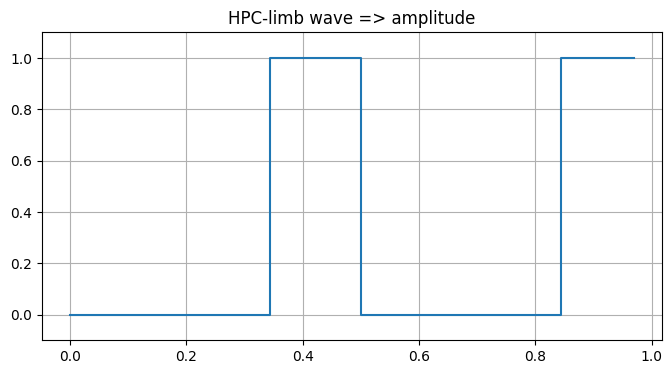

In [7]:
big_wave = MegaBinary("0")
# Let's SHIFT in 32 bits of a wave
steps = 32
freq_demo = 2.0
duty_demo = 0.3
for i in range(steps):
    t = i/float(steps)
    wave_bit = big_wave.generate_wave_bit(t, freq_demo, duty_demo)
    big_wave.shift_in_bit(wave_bit)

print("\nBig HPC wave =>", big_wave.to_string())
t_wave, y_wave = big_wave.to_waveform(steps, sample_rate=steps, amplitude=1.0)

plt.figure(figsize=(8,4))
plt.step(t_wave, y_wave, where='post')
plt.title("HPC-limb wave => amplitude")
plt.ylim(-0.1,1.1)
plt.grid(True)
plt.show()

In [8]:
# Test prime number sequence
prime_numbers = [2, 3, 5, 7, 11, 13]
byte_array = bytearray(prime_numbers)
binary = MegaBinary(byte_array)

print("Prime numbers:", prime_numbers)
print("As bytearray:", byte_array)
print("As binary string:", binary.to_string())
print("Recovered bytes:", list(binary.to_bytes()))
print("Values preserved:", list(binary.to_bytes()) == prime_numbers)

Prime numbers: [2, 3, 5, 7, 11, 13]
As bytearray: bytearray(b'\x02\x03\x05\x07\x0b\r')
As binary string: 100000001100000101000001110000101100001101
Recovered bytes: [2, 3, 5, 7, 11, 13]
Values preserved: True


## Binary to Float Conversion

In [9]:
from bizarromath.meganumber.mega_float import MegaFloat

# Create binary numbers
numerator = MegaBinary(bytes([0xFF, 0x00]))    # 1111 1111 0000 0000
denominator = MegaBinary(bytes([0x10]))        # 0001 0000

# Perform division to get float
result = numerator.div(denominator)

print(f"Binary numerator: {numerator.to_string()}")
print(f"Binary denominator: {denominator.to_string()}")
print(f"Result as float: {result.to_decimal_string()}")
print(f"Verification: {int(numerator.to_string(), 2)} / {int(denominator.to_string(), 2)} = {int(numerator.to_string(), 2) / int(denominator.to_string(), 2)}")

# Convert back to binary
binary_result = MegaBinary(bin(int(float(result.to_decimal_string())))[2:])
print(f"\nBack to binary: {binary_result.to_string()}")

# Show as bytes
print(f"Original bytes: {numerator.to_bytes().hex()} / {denominator.to_bytes().hex()}")
print(f"Result bytes: {binary_result.to_bytes().hex()}")

Binary numerator: 1111111100000000
Binary denominator: 10000
Result as float: 4080
Verification: 65280 / 16 = 4080.0

Back to binary: 111111110000
Original bytes: ff00 / 10
Result bytes: ff00


Generated wave pattern: 11111111111111111111111111111111000000000000000000000000000000001111111111111111111111111111111100000000000000000000000000000000
Duty cycle wave: 11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

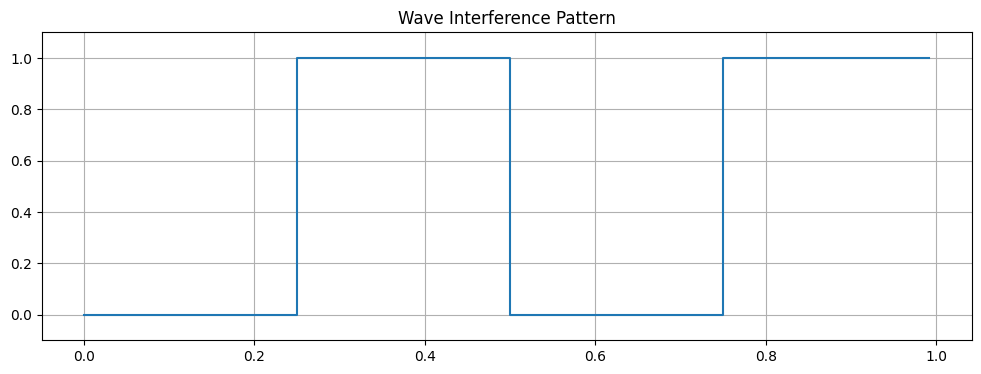

In [12]:
# Create a simple wave pattern
length_128 = MegaBinary("10000000")  # binary 128 decimal
pattern_wave = MegaBinary("0")
duty_cycle = 0.5
freq = 2.0

# Generate wave pattern
for i in range(128):
    t = i/128.0
    phase = (t * freq) % 1.0
    wave_bit = 1 if phase < duty_cycle else 0
    pattern_wave.shift_in_bit(wave_bit)

print("Generated wave pattern:", pattern_wave.to_string())

# Create a duty cycle wave
wave_half = MegaBinary("1000000")  # 64 in binary
duty_wave = MegaBinary.create_duty_cycle(length_128, wave_half)
print("Duty cycle wave:", duty_wave.to_string())

# Create interference between waves
interference = MegaBinary.interfere([pattern_wave, duty_wave], InterferenceMode.XOR)
print("Interference pattern:", interference.to_string())

# Plot the result
t_wave, y_wave = interference.to_waveform(128, sample_rate=128, amplitude=1.0)
plt.figure(figsize=(12,4))
plt.step(t_wave, y_wave, where='post')
plt.title("Wave Interference Pattern")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()